In [1]:
#Libraries for the tutorial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")
ddos_data.rename(columns=lambda x: x.strip(), inplace=True)
ddos_data['SimillarHTTP'] = ddos_data['SimillarHTTP'].apply(lambda x: str(x) if x == 0 else x)
ddos_data['SimillarHTTP'] = ddos_data['SimillarHTTP'].str.strip().fillna(0, inplace=True)


C:\Users\rizzo\AppData\Local\Temp\ipykernel_15684\1461176099.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")


In [3]:
#standardize
# Get X and y
ddos_data.drop(columns=["Unnamed: 0","Destination IP","Source IP","Timestamp","SimillarHTTP"],axis=1,inplace=True)
ddos_data=ddos_data.set_index('Flow ID')
X = ddos_data.drop(columns=['label']).to_numpy()
y = ddos_data[['label']].values

# Scale Data
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=9, random_state = 15)
X_s = pca.fit_transform(X_s)


test1---
test2---
test3---
test4---
test5---
test6---
test7---
test8---
test1---
test2---
test3---
test4---
test5---
test6---
test7---
test8---
best k:  3  with corresponding silhouette:  0.3022025805265915


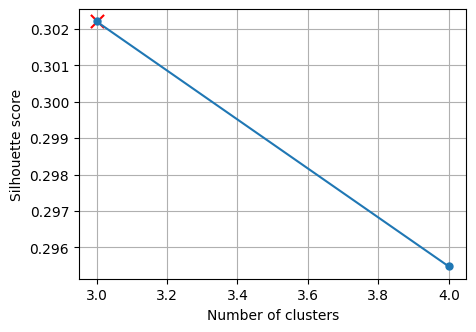

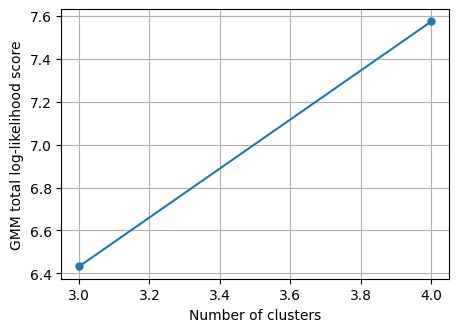

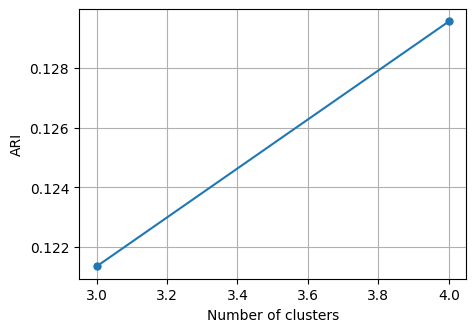

In [4]:
#GaussianMixture
#In this case use as hyper-parameter init_params = kmeans

#We computer the different scores for each iteration

n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
log_l_list=[]
for n_clusters in range(3, 5):
    gmm = GaussianMixture(n_components=n_clusters, init_params='kmeans')
    print("test1---")
    cl_labels = gmm.fit_predict(X_s)
    print("test2---")
    silhouette  = silhouette_score(X_s, cl_labels)
    print("test3---")
    n_cluster_list.append(n_clusters)
    print("test4---")
    shs_list.append(silhouette)
    print("test5---")
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    print("test6---")
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    print("test7---")
    log_l_list.append(gmm.score(X_s))
    print("test8---")
    


#2. Plot the silhouette score

# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)


# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()


best k:  3  with corresponding silhouette:  0.4647680452902174


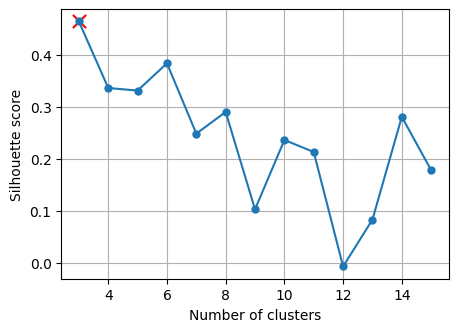

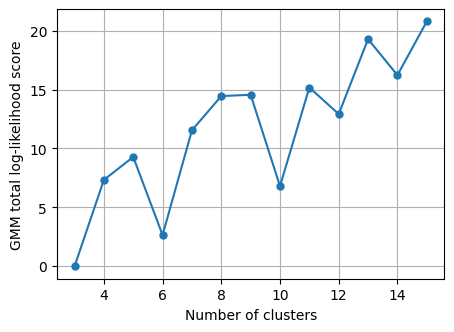

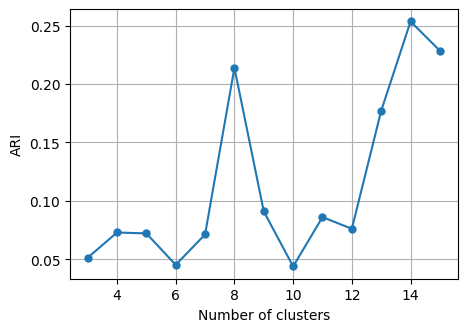

In [5]:
#GaussianMixture
#In this case use as hyper-parameter init_params = random

#We computer the different scores for each iteration

n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
log_l_list=[]
for n_clusters in range(3, 16):
    gmm = GaussianMixture(n_components=n_clusters, init_params='random')
    cl_labels = gmm.fit_predict(X_s)
    silhouette  = silhouette_score(X_s, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    log_l_list.append(gmm.score(X_s))
    

#2. Plot the silhouette score

# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()


C:\Users\rizzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rizzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rizzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

test----------
best k:  9  with corresponding silhouette:  0.6471409473570807


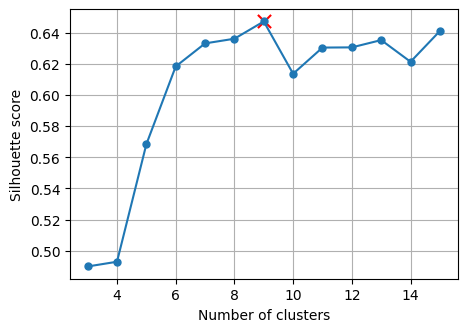

In [6]:
#K-means

# Step 1
n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
inertia_list=[]

#try for different numbers of clusters
for n_clusters in range(3, 16):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X_s)
    # Unsupervised metric
    silhouette  = silhouette_score(X_s, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    inertia_list.append(kmeans.inertia_)
print("test----------")

    
# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [7]:
# Utilizza il modello GMM o KMeans 
model = GaussianMixture(n_components=best_n, init_params='kmeans')  # o KMeans(n_clusters=best_n)

# Ottieni le etichette del cluster
cluster_labels = model.fit_predict(X_s)

# Calcola le metriche di clustering
silhouette = silhouette_score(X_s, cluster_labels)
ari = adjusted_rand_score(np.ravel(y), cluster_labels)

# Stampa le metriche
print(f"Silhouette Score: {silhouette}")
print(f"Adjusted Rand Index: {ari}")


Silhouette Score: 0.6003552394142906
Adjusted Rand Index: 0.2636072636268267


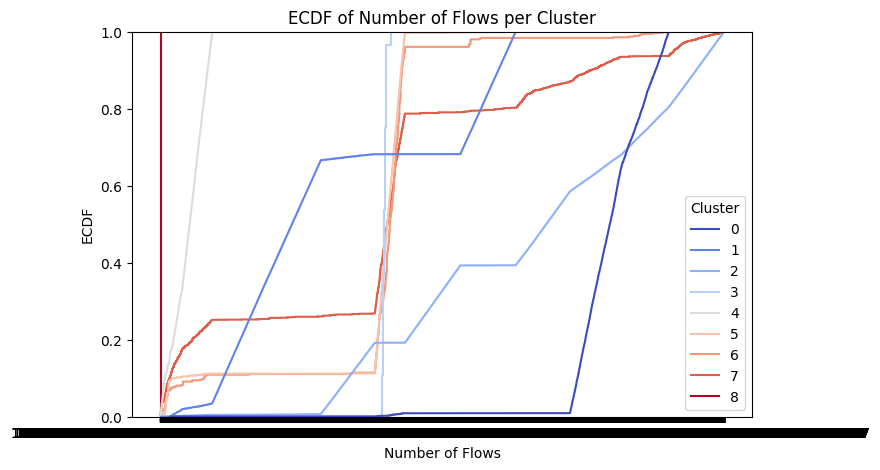

In [8]:
# Analizza il numero di flussi per cluster
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'NumFlows': ddos_data.index}).reset_index()

# Plot ECDF per il numero di flussi per cluster
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=cluster_df, x='NumFlows', hue='Cluster',palette='coolwarm')
plt.title('ECDF of Number of Flows per Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')
plt.show()

